In [1]:
# imports
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

from ldc.lisa.noise import get_noise_model
from ldc.common.series.timeseries import TimeSeries, TimeSeriesAccessor

In /home/philippe/.local/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/philippe/.local/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/philippe/.local/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/philippe/.local/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/philippe/.local/lib/python3.8/site-packages/matplotlib/

In [2]:
# define general parameters
target_t0 = 0 # s
target_dt = 5 # s
two_yrs_in_sec = 63115195.0 # s = 2 yrs
target_duration = 2 * (0.5 * two_yrs_in_sec)
pathdir = "/home/philippe/Desktop/livrables_yorsh/"

SBBH TDI1.5 verification
====================

Below are denoted *sbbh1* and *sbbh2* the low (env. 10) and moderate (env. 25) SNR SBBH systems

In [3]:
# load final data (2 yrs)
filename_clean_sbbh1 = pathdir+"TDI1p5_LDC_SBBH_SNR_11.82_Tobs_2yrs_noisefree.hdf5"
filename_clean_sbbh2 = pathdir+"TDI1p5_LDC_SBBH_SNR_24.72_Tobs_2yrs_noisefree.hdf5"
filename_noisy_sbbh1 = pathdir+"sbbh-lisanode-withnoise-tdi_custom_sbbh_11.82_T2yrs.h5"
filename_noisy_sbbh2 = pathdir+"sbbh-lisanode-withnoise-tdi_custom_sbbh_24.72_T2yrs.h5"

f_clean_sbbh1 = h5py.File(filename_clean_sbbh1, "r")
f_clean_sbbh2 = h5py.File(filename_clean_sbbh2, "r")
f_noisy_sbbh1 = h5py.File(filename_noisy_sbbh1, "r")
f_noisy_sbbh2 = h5py.File(filename_noisy_sbbh2, "r")

d_clean_sbbh1 = f_clean_sbbh1["XYZ"]
d_clean_sbbh2 = f_clean_sbbh2["XYZ"]
d_noisy_sbbh1 = f_noisy_sbbh1["data"]
d_noisy_sbbh2 = f_noisy_sbbh2["data"]

Perform general checks on starting time, cadence and duration

In [4]:
## general checks
t_clean_sbbh1 = d_clean_sbbh1[:, 0]
t_noisy_sbbh1 = d_noisy_sbbh1["t"]
t_clean_sbbh2 = d_clean_sbbh2[:, 0]
t_noisy_sbbh2 = d_noisy_sbbh2["t"]

# final cadence (in s)
dt_clean_sbbh1 = t_clean_sbbh1[1] - t_clean_sbbh1[0]
dt_noisy_sbbh1 = t_noisy_sbbh1[1] - t_noisy_sbbh1[0]
if np.isclose(target_dt, dt_clean_sbbh1, atol=1e-3):
    print(f"OK dt for noisefree TDI (dt_noisefree = {dt_clean_sbbh1})")
if np.isclose(target_dt, dt_noisy_sbbh1, atol=1e-3):
    print(f"OK dt for noisy TDI (dt_noisy = {dt_noisy_sbbh1[0]})")
    
# duration (in s, yrs)
duration_clean_sbbh1 = t_clean_sbbh1[-1] - t_clean_sbbh1[0]
duration_noisy_sbbh1 = t_noisy_sbbh1[-1] - t_noisy_sbbh1[0]
if np.isclose(target_duration, duration_clean_sbbh1, atol=1e-3):
    print(f"OK duration for noisefree TDI (duration_noisefree = {duration_clean_sbbh1})")
if np.isclose(target_duration, duration_noisy_sbbh1, atol=1e-3):
    print(f"OK duration for noisy TDI (duration_noisy = {duration_noisy_sbbh1[0]})")

OK dt for noisefree TDI (dt_noisefree = 5.0)
OK dt for noisy TDI (dt_noisy = 5.0)
OK duration for noisefree TDI (duration_noisefree = 63115195.0)
OK duration for noisy TDI (duration_noisy = 63115195.0)


Compare PSDs

In [5]:
## Compute PSD
X_clean_sbbh1 = d_clean_sbbh1[:, 1]
X_clean_sbbh2 = d_clean_sbbh2[:, 1]
X_noisy_sbbh1 = d_noisy_sbbh1["X"]
X_noisy_sbbh2 = d_noisy_sbbh2["X"]

t_noisy_sbbh1 = t_noisy_sbbh1[~np.isnan(X_noisy_sbbh1)]
X_noisy_sbbh1 = X_noisy_sbbh1[~np.isnan(X_noisy_sbbh1)]
t_noisy_sbbh2 = t_noisy_sbbh2[~np.isnan(X_noisy_sbbh2)]
X_noisy_sbbh2 = X_noisy_sbbh2[~np.isnan(X_noisy_sbbh2)]

nperseg=50000
window="nuttall"
skipf = 100

f_clean_sbbh1, psd_clean_sbbh1 = welch(X_clean_sbbh1[skipf:], fs=1.0/target_dt, window=window, nperseg=nperseg)
f_clean_sbbh2, psd_clean_sbbh2 = welch(X_clean_sbbh2[skipf:], fs=1.0/target_dt, window=window, nperseg=nperseg)
f_noisy_sbbh1, psd_noisy_sbbh1 = welch(X_noisy_sbbh1[skipf:], fs=1.0/target_dt, window=window, nperseg=nperseg)
f_noisy_sbbh2, psd_noisy_sbbh2 = welch(X_noisy_sbbh2[skipf:], fs=1.0/target_dt, window=window, nperseg=nperseg)

# reference PSD
tdi2 = False
noise_model = "MRDv1"

N_ldc_MRDv1 = get_noise_model(noise_model, f_clean_sbbh1)
psd_ref = N_ldc_MRDv1.psd(f_clean_sbbh1, option='X', tdi2=tdi2)

/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:213: RuntimeWarning: divide by zero encountered in true_divide
  Sa_a = self.DSa_a[model] * (1.0 +(0.4e-3/frq)**2) *\
/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:215: RuntimeWarning: divide by zero encountered in power
  self.Sa_d = Sa_a*(2.*np.pi*frq)**(-4.) # in displacement
/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:216: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = self.Sa_d*(2.0*np.pi*frq/CLIGHT)**2 # in rel freq unit
/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:220: RuntimeWarning: divide by zero encountered in true_divide
  self.Soms_d = self.DSoms_d[model] * (1. + (2.e-3/frq)**4) # in displacement
/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:221: RuntimeWarning: invalid va

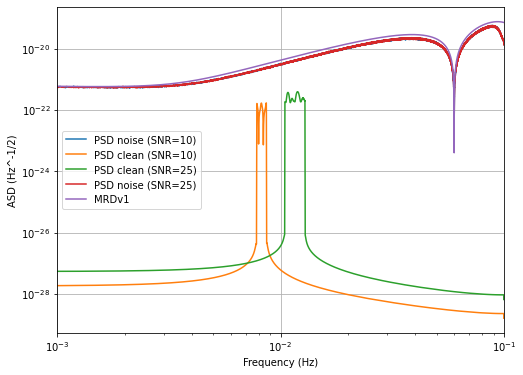

In [6]:
## plot PSDs
asd_ref = np.sqrt(psd_ref)
asd_clean_sbbh1 = np.sqrt(psd_clean_sbbh1)
asd_clean_sbbh2 = np.sqrt(psd_clean_sbbh2)
asd_noisy_sbbh1 = np.sqrt(psd_noisy_sbbh1)
asd_noisy_sbbh2 = np.sqrt(psd_noisy_sbbh2)

del psd_clean_sbbh1, psd_clean_sbbh2, psd_noisy_sbbh1, psd_noisy_sbbh2

fplot = plt.loglog
fig = plt.figure(figsize=(8, 6))

fplot(f_noisy_sbbh1, asd_noisy_sbbh1, label="PSD noise (SNR=10)")
fplot(f_clean_sbbh1, asd_clean_sbbh1, label="PSD clean (SNR=10)")
fplot(f_clean_sbbh2, asd_clean_sbbh2, label="PSD clean (SNR=25)")
fplot(f_noisy_sbbh2, asd_noisy_sbbh2, label="PSD noise (SNR=25)")
fplot(f_clean_sbbh1, asd_ref, label=noise_model)

plt.xlim([1e-3, 1e-1])
plt.xlabel("Frequency (Hz)")
plt.ylabel("ASD (Hz^-1/2)")
plt.legend()
plt.grid()
plt.show()

del asd_ref, asd_clean_sbbh1, asd_clean_sbbh2, asd_noisy_sbbh1, asd_noisy_sbbh2

Plot noise and noisefree data
========================

TDI signals consist in 12,623,040 samples that cumulates 2 yrs = 63,115,200 s of data (cadence is 5s <-> 0.2 Hz).

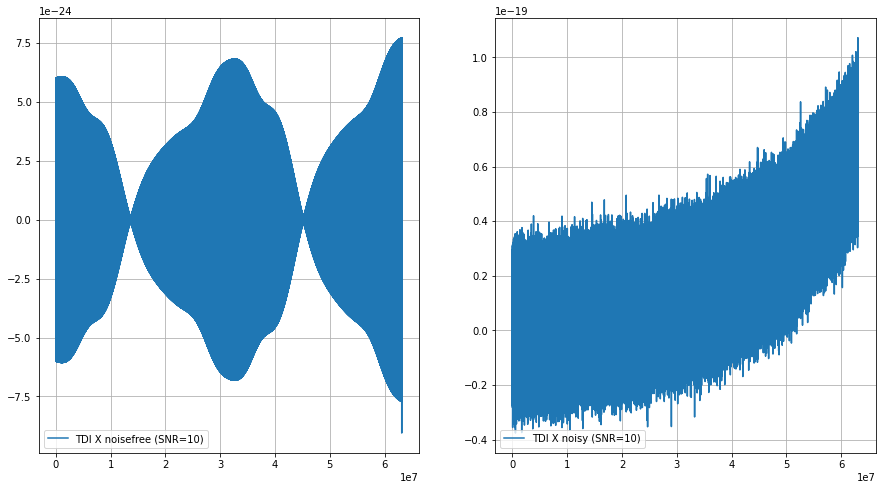

In [7]:
# plot TDI timeseries for SBBH1
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 8))
ax[0].plot(t_clean_sbbh1, X_clean_sbbh1, label="TDI X noisefree (SNR=10)")
ax[0].grid()
ax[0].legend(loc="lower left")
ax[1].plot(t_noisy_sbbh1, X_noisy_sbbh1, label="TDI X noisy (SNR=10)")
ax[1].legend(loc="lower left")
ax[1].grid()

del t_noisy_sbbh1, X_noisy_sbbh1

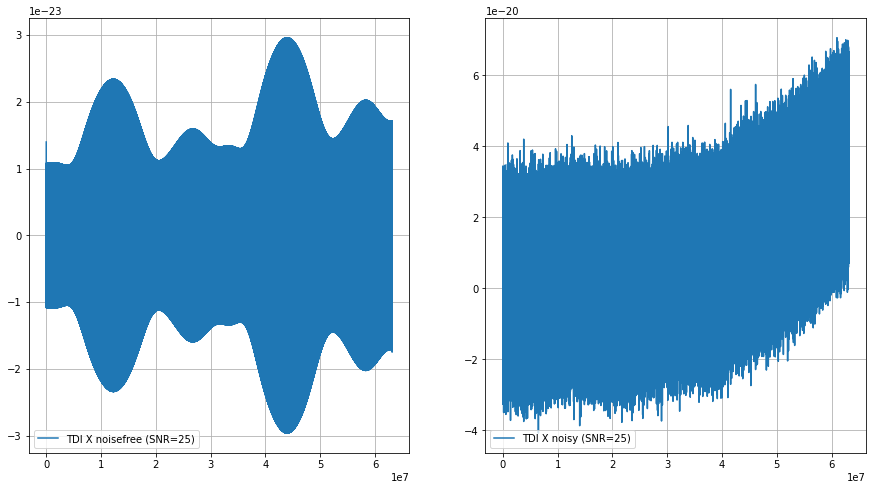

In [8]:
# plot TDI timeseries for SBBH2
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 8))

ax[0].plot(t_clean_sbbh2, X_clean_sbbh2, label="TDI X noisefree (SNR=25)")
ax[0].grid()
ax[0].legend(loc="lower left")

ax[1].plot(t_noisy_sbbh2, X_noisy_sbbh2, label="TDI X noisy (SNR=25)")
ax[1].legend(loc="lower left")
ax[1].grid()

del t_noisy_sbbh2, X_noisy_sbbh2

FastWaveform comparison
======================

In [9]:
from astropy import units as un

from ldc.waveform.lisabeta.fast_bhb import FastBHB
from ldc.lisa.orbits import Orbits

bbh_type = 'sobhb'
approximant = 'IMRPhenomD'
lisa_orbits = Orbits.type(
    dict({"nominal_arm_length":2.5e9*un.m,
          "initial_rotation":0*un.rad,
          "initial_position":0*un.rad,
          "orbit_type":"analytic"})
)
params_sbbh1 = {
    'EclipticLatitude': 5.370206813497192, 
    'EclipticLongitude': 0.35245962532899716, 
    'Mass1': 75.03773457766954,
    'Mass2': 69.85751251069846, 
    'Spin1': 0.04070349896096395, 
    'Spin2': -0.05176045515944489, 
    'Inclination': 0.41422341870704993, 
    'InitialFrequency': 0.007817857098648729, 
    'InitialPhase': 0.0, 
    'Polarization': 5.061436275935904, 
    'Redshift': 0.0743376051128294, 
    'Distance': 350.4221276842112, 
    'Cadence': 5.0, 
    'ObservationDuration': 63115200.0,
    'SNR': 11.822183841466524
}
params_sbbh2 = {
    'EclipticLatitude': 0.3361945823566524, 
    'EclipticLongitude': -0.8777060028716045, 
    'Mass1': 79.20437501192268, 
    'Mass2': 54.13511618304004, 
    'Spin1': -0.029308093375348003, 
    'Spin2': 0.07127380434748923, 
    'Inclination': 0.5150723317250367, 
    'InitialFrequency': 0.010450810753288828, 
    'InitialPhase': 0.0, 
    'Polarization': 5.376472875985286, 
    'Redshift': 0.0380373924232636, 
    'Distance': 174.800663606641, 
    'Cadence': 5, 
    'ObservationDuration': 63116299.52709119,
    'SNR': 24.72084306538385
}

fastbbh_sbbh1 = FastBHB(bbh_type, T=target_duration, delta_t=target_dt, approx=approximant, orbits=lisa_orbits)
XYZ_fast_sbbh1 = fastbbh_sbbh1.get_td_tdixyz(template=params_sbbh1, tdi2=False)
fastbbh_sbbh2 = FastBHB(bbh_type, T=target_duration, delta_t=target_dt, approx=approximant, orbits=lisa_orbits)
XYZ_fast_sbbh2 = fastbbh_sbbh2.get_td_tdixyz(template=params_sbbh2, tdi2=False)

del fastbbh_sbbh1, fastbbh_sbbh2, lisa_orbits

/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:213: RuntimeWarning: divide by zero encountered in true_divide
  Sa_a = self.DSa_a[model] * (1.0 +(0.4e-3/frq)**2) *\
/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:215: RuntimeWarning: divide by zero encountered in power
  self.Sa_d = Sa_a*(2.*np.pi*frq)**(-4.) # in displacement
/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:216: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = self.Sa_d*(2.0*np.pi*frq/CLIGHT)**2 # in rel freq unit
/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:220: RuntimeWarning: divide by zero encountered in true_divide
  self.Soms_d = self.DSoms_d[model] * (1. + (2.e-3/frq)**4) # in displacement
/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:221: RuntimeWarning: invalid va

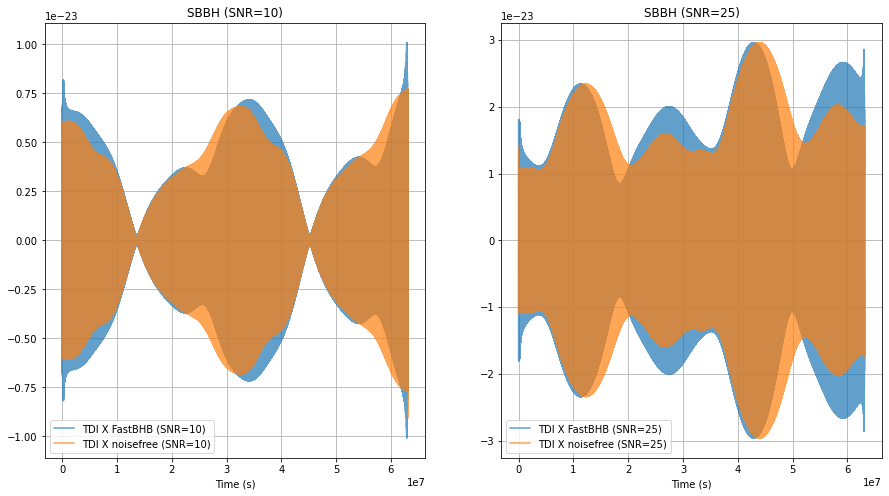

In [10]:
# compare TDIs in TD
X_fast_sbbh1 = XYZ_fast_sbbh1[0] # (12623038,)
X_fast_sbbh2 = XYZ_fast_sbbh2[0]

N_ldc_SciRDv1 = get_noise_model("SciRDv1", f_clean_sbbh1)

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 8))

ax[0].plot(X_fast_sbbh1.t, X_fast_sbbh1, alpha=0.7, label="TDI X FastBHB (SNR=10)")
ax[0].plot(t_clean_sbbh1, X_clean_sbbh1, alpha=0.7, label="TDI X noisefree (SNR=10)")
ax[0].set_title("SBBH (SNR=10)")
ax[0].set_xlabel("Time (s)")
ax[0].legend(loc="lower left")
ax[0].grid()

ax[1].plot(X_fast_sbbh2.t, X_fast_sbbh2, alpha=0.7, label="TDI X FastBHB (SNR=25)")
ax[1].plot(t_clean_sbbh2, X_clean_sbbh2, alpha=0.7, label="TDI X noisefree (SNR=25)")
ax[1].set_title("SBBH (SNR=25)")
ax[1].set_xlabel("Time (s)")
ax[1].legend(loc="lower left")
ax[1].grid()

In [11]:
# compare TDIs in FD
def window(tm, show=False):
    xl = 1000
    ind_r = np.argwhere(tm[-1]-tm <= xl)[0][0]
    xr = tm[ind_r]
    kap = 0.005
    winl = 0.5*(1.0 + np.tanh(kap*(tm-xl)))
    winr = 0.5*(1.0 - np.tanh(kap*(tm-xr)))
    if show:
        plt.plot(tm, winl)
        plt.plot(tm, winr)
        plt.grid(True)
        plt.show()
    return (winl*winr)

# X_fast_sbbh1_ts = TimeSeries(X_fast_sbbh1, dt=target_dt)
# X_fast_sbbh1_fs = TimeSeriesAccessor(X_fast_sbbh1_ts).fft(win=window)

# X_clean_sbbh1_ts = TimeSeries(X_clean_sbbh1, dt=target_dt)
# X_clean_sbbh1_fs = TimeSeriesAccessor(X_clean_sbbh1_ts).fft(win=window)

# X_fast_sbbh2_ts = TimeSeries(X_fast_sbbh2, dt=target_dt)
# X_fast_sbbh2_fs = TimeSeriesAccessor(X_fast_sbbh2_ts).fft(win=window)

# X_clean_sbbh2_ts = TimeSeries(X_clean_sbbh2, dt=target_dt)
# X_clean_sbbh2_fs = TimeSeriesAccessor(X_clean_sbbh2_ts).fft(win=window)

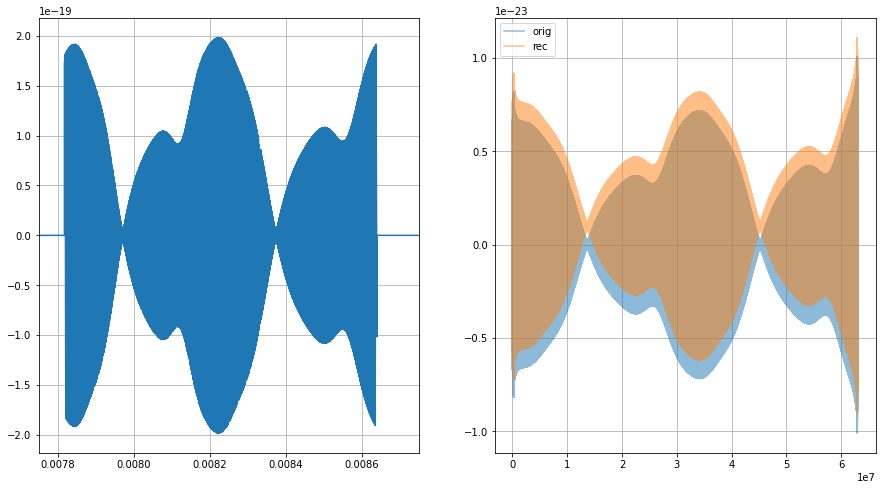

In [12]:
# going back and forth TD/FD for FAST sbbh1
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

X_fast_sbbh1_tilde = np.fft.rfft(X_fast_sbbh1) # (6311520,)
f = np.fft.rfftfreq(X_fast_sbbh1.size, d=target_dt)
ax[0].plot(f, np.real(X_fast_sbbh1_tilde))
ax[0].set_xlim([0.00775, 0.00875])
ax[0].grid()

X_fast_sbbh1_rec = np.fft.irfft(X_fast_sbbh1_tilde) # (12623038,)
ax[1].plot(t_clean_sbbh1[:-2], X_fast_sbbh1, label='orig', alpha=0.5)
ax[1].plot(t_clean_sbbh1[:-2], X_fast_sbbh1_rec+0.1e-23, label='rec', alpha=0.5)
ax[1].legend()
ax[1].grid()

del f, X_fast_sbbh1_tilde, X_fast_sbbh1_rec

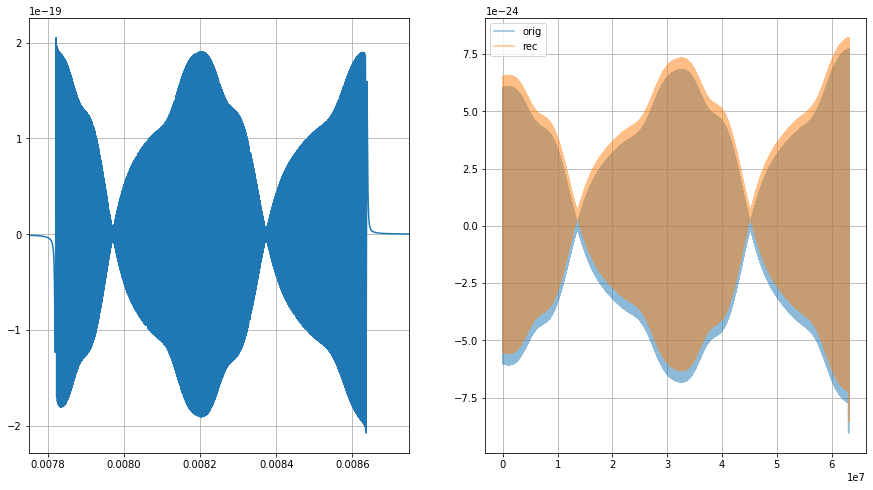

In [13]:
# going back and forth TD/FD for CLEAN sbbh1
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

X_clean_sbbh1_tilde = np.fft.rfft(X_clean_sbbh1) # (6311521,)
f = np.fft.rfftfreq(X_clean_sbbh1.size, d=target_dt)
ax[0].plot(f, np.real(X_clean_sbbh1_tilde))
ax[0].set_xlim([0.00775, 0.00875])
ax[0].grid()

X_clean_sbbh1_rec = np.fft.irfft(X_clean_sbbh1_tilde) # (12623040,)
ax[1].plot(t_clean_sbbh1, X_clean_sbbh1, label='orig', alpha=0.5)
ax[1].plot(t_clean_sbbh1, X_clean_sbbh1_rec+0.5e-24, label='rec', alpha=0.5)
ax[1].legend()
ax[1].grid()

del f, X_clean_sbbh1_tilde, X_clean_sbbh1_rec

In [14]:
# going back and forth TD/FD for sbbh2
# fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# X_fast_sbbh2_tilde = np.fft.rfft(X_fast_sbbh2)
# f = np.fft.rfftfreq(X_fast_sbbh2.size, d=target_dt)
# ax[0].plot(f, X_fast_sbbh2_tilde)
# ax[0].set_xlim([0.0, 0.02])
# ax[0].grid()

# X_fast_sbbh2_rec = np.fft.irfft(X_fast_sbbh2_tilde)
# ax[1].plot(X_fast_sbbh2, label='orig', alpha=0.5)
# ax[1].plot(X_fast_sbbh2_rec, label='rec', alpha=0.5)
# ax[1].legend()
# ax[1].grid()

In [15]:
# plt.plot(X_fast_sbbh1_fs.f, np.abs(X_fast_sbbh1_fs), alpha=0.7, label="fast")
# plt.plot(X_clean_sbbh1_fs.f, np.abs(X_clean_sbbh1_fs), alpha=0.7, label="clean")
# plt.xlim([7e-3, 9e-3])
# plt.legend()
# # print(X_fast_sbbh1_ts)
# # print(X_fast_sbbh1_ts)
# print(X_fast_sbbh1_fs)
# print(X_clean_sbbh1_fs)

### Check that going back and forth btw TD/FD 
### gives same result.
# from ldc.common.series.timeseries import FrequencySeries
# X_fast_sbbh1_ts = TimeSeries(X_fast_sbbh1, dt=target_dt)
# X_fast_sbbh1_fs = TimeSeriesAccessor(X_fast_sbbh1_ts)
# fd = X_fast_sbbh1_fs.fft(win=window)
# fs = FrequencySeries(fd, df=1/target_duration)
# fsa = TimeSeriesAccessor(fs)
# rtd = fsa.ifft(dt=target_dt)

# plt.plot(X_fast_sbbh1, alpha=0.7, label="orig")
# plt.plot(rtd+0.1e-23, alpha=0.7, label="rec")
# diff = X_fast_sbbh1 - rtd
# plt.plot(diff[1000:-1000], alpha=0.7, label="diff")
# plt.legend()

In [16]:
# fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# ax[0].plot(X_fast_sbbh1_fs.f, X_fast_sbbh1_fs, alpha=0.7, label="TDI X FastBHB (SNR=10)")
# ax[0].plot(X_clean_sbbh1_fs.f, X_clean_sbbh1_fs, alpha=0.7, label="TDI X noisefree (SNR=10)")
# ax[0].set_title("SBBH (SNR=10)")
# ax[0].set_xlabel("Frequency (Hz)")
# ax[0].legend(loc="lower left")
# ax[0].set_xlim([0.00775, 0.00875])
# ax[0].grid()

# ax[1].plot(X_fast_sbbh2_fs.f, X_fast_sbbh2_fs, alpha=0.7, label="TDI X FastBHB (SNR=25)")
# ax[1].plot(X_clean_sbbh2_fs.f, X_clean_sbbh2_fs, alpha=0.7, label="TDI X noisefree (SNR=25)")
# ax[1].set_title("SBBH (SNR=25)")
# ax[1].set_xlabel("Frequency (Hz)")
# ax[1].legend(loc="lower left")
# ax[1].set_xlim([0.0102, 0.013])
# ax[1].grid()

SNR estimation (a posteriori)
========================

In [17]:
from ldc.common.tools.snr import compute_tdi_snr
from ldc.common.series import TDI
from ldc.common.series.timeseries import FrequencySeries, TimeSeriesAccessor

try:
    del X_fast_sbbh1_ts, X_fast_sbbh1_fs
    del X_fast_sbbh2_ts, X_fast_sbbh2_fs
    del X_fast_sbbh1, X_fast_sbbh2
except NameError:
    pass

def get_snr(XYZ, N_ldc):
    X = TimeSeries(XYZ[0], dt=target_dt)
    Y = TimeSeries(XYZ[1], dt=target_dt)
    Z = TimeSeries(XYZ[2], dt=target_dt)
    X = TimeSeriesAccessor(X).fft(win=window)
    Y = TimeSeriesAccessor(Y).fft(win=window)
    Z = TimeSeriesAccessor(Z).fft(win=window)
    tdi = TDI(dict(zip(["X", "Y", "Z"], [X, Y, Z])))
    dict_sbbh = compute_tdi_snr(tdi, N_ldc, AET=False)
    return np.sqrt(dict_sbbh['tot2'])
    
snr_fast_sbbh1 = get_snr(XYZ_fast_sbbh1, N_ldc_SciRDv1)
snr_fast_sbbh2 = get_snr(XYZ_fast_sbbh2, N_ldc_SciRDv1)

X_clean_sbbh1 = d_clean_sbbh1[:, 1]
Y_clean_sbbh1 = d_clean_sbbh1[:, 2]
Z_clean_sbbh1 = d_clean_sbbh1[:, 3]
snr_clean_sbbh1 = get_snr((X_clean_sbbh1, Y_clean_sbbh1, Z_clean_sbbh1), N_ldc_SciRDv1)

del X_clean_sbbh1, Y_clean_sbbh1, Z_clean_sbbh1

X_clean_sbbh2 = d_clean_sbbh2[:, 1]
Y_clean_sbbh2 = d_clean_sbbh2[:, 2]
Z_clean_sbbh2 = d_clean_sbbh2[:, 3]
snr_clean_sbbh2 = get_snr((X_clean_sbbh2, Y_clean_sbbh2, Z_clean_sbbh2), N_ldc_SciRDv1)

del X_clean_sbbh2, Y_clean_sbbh2, Z_clean_sbbh2

print(f"SNRs FastBHB:")
print(f"> SNR_[SBBH1]={snr_fast_sbbh1}")
print(f"> SNR_[SBBH2]={snr_fast_sbbh2}")

print(f"SNRs clean:")
print(f"> SNR_[SBBH1]={snr_clean_sbbh1}")
print(f"> SNR_[SBBH2]={snr_clean_sbbh2}")

SNRs FastBHB:
> SNR_[SBBH1]=11.882565162645019
> SNR_[SBBH2]=25.422222067020297
SNRs clean:
> SNR_[SBBH1]=11.822163386964856
> SNR_[SBBH2]=24.72083547207063


In [18]:
flag_clean1 = np.isclose(snr_clean_sbbh1, params_sbbh1['SNR'], atol=1e-3)
flag_clean2 = np.isclose(snr_clean_sbbh2, params_sbbh2['SNR'], atol=1e-3)
print(flag_clean1, flag_clean2)

flag_fast1 = np.isclose(snr_fast_sbbh1, snr_clean_sbbh1, atol=.8)
flag_fast2 = np.isclose(snr_fast_sbbh2, snr_clean_sbbh2, atol=.8)
print(flag_fast1, flag_fast2)

True True
True True
